Found 100 Q-tables.
Generated images for all Q-tables.
Saved animated GIF: q-tables/qtable_evolution.gif


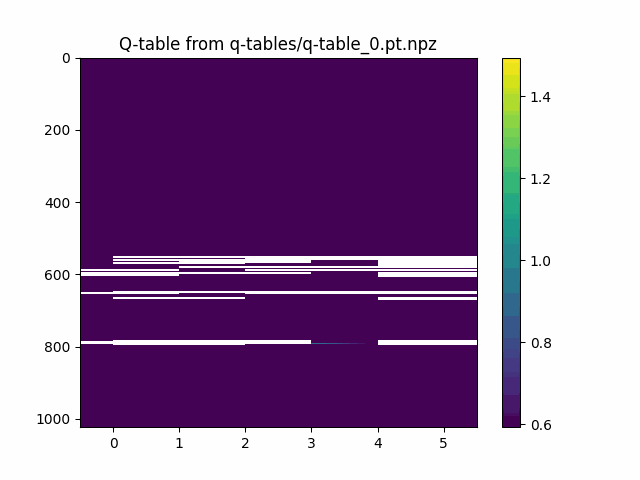

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from glob import glob
from IPython.display import Image, display
import imageio

# Step 1: List all q-table files
file_pattern = re.compile(r'q-tables/q-table_(\d+)\.pt\.npz')
q_files = sorted(glob("q-tables/q-table_*.pt.npz"), key=lambda x: int(file_pattern.search(x).group(1)))

print(f"Found {len(q_files)} Q-tables.")

# Step 2: Create a folder for saving plots
os.makedirs("qtable_images", exist_ok=True)

# Step 3: Visualize each Q-table
images = []
for file in q_files:
    data = np.load(file)
    q = data['q']

    fig, ax = plt.subplots()
    cax = ax.imshow(q, aspect='auto', cmap='viridis')
    plt.colorbar(cax)
    ax.set_title(f"Q-table from {file}")

    img_path = f"qtable_images/{os.path.basename(file).replace('.npz', '.png')}"
    plt.savefig(img_path)
    plt.close(fig)

    images.append(imageio.v2.imread(img_path))

print("Generated images for all Q-tables.")

# Step 4 (Optional): Create a GIF
gif_path = "q-tables/qtable_evolution.gif"
imageio.mimsave(gif_path, images, fps=2)
print(f"Saved animated GIF: {gif_path}")

# Step 5: Display the GIF inside Jupyter Notebook
display(Image(filename=gif_path))
